In [1]:
import csv, math
from math import exp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pid_controller(error_hist):

    # parameters
    Kp=0.5
    Ki=1
    tor_i=100
    Kd=0.05
    u_steady = (5/54) * 12 * 15
    
    calc_u = u_steady + Kp * error_hist[-1] + Ki * sum(error_hist) / tor_i + Kd * (error_hist[-1] - error_hist[-2])
    
    if calc_u < 0:
        calc_u=0
    
    return calc_u

In [3]:
# Human Glucose - Insulin System Model by Bergman 1981
# A simple 3 equation model.
    
# States = [Plasma Glucose(G), 
#           Plasma Insulin Remote Compartment(X), 
#           Plasma Insulin(I)]

def bergman_minmod(x, U, D):

    G=x[0]
    X=x[1]
    I=x[2]
    # Parameters
    Gb=4.5
    Xb=15
    Ib=15
    # For T1D, Some papers P1 = 0 to T1D
    P1=0.028735
    P2=0.028344
    P3=5.035e-05
    V1=12
    n=5 / 54
    # Minimal Model
    Gdt = -P1 * (G - Gb) - (X - Xb) * G + D
    Xdt = -P2 * (X - Xb) + P3 * (I - Ib)
    Idt = -n * I + U / V1
    dx_dt = (Gdt, Xdt, Idt)

    return dx_dt

In [4]:
def meal_profile(t):

    # One meal
    # d = 3 * exp(-0.05 * (t));
    
    #Two meals
    if t < 100:
        d = 0
    elif t >= 100 and t < 500:
        d = 3 * exp(-0.05 * (t-100))
    elif t >= 500 and t < 600:
        d = 0
    elif t >= 600 and t < 1000:
        d = 1 * exp(-0.05 * (t-600))
    else:
        d = 0

    return d

In [5]:
# # Run the simulation for Bergman Glucose Model
# tend = 1000
# tspan = [i for i in range(tend)]

# x0 = [4.5, 15, 15]
# glucose_high = 8.3
# glucose_low = 4.4
# g_target = 6

# # meal
# d = []
# for t in range(tspan):
#     d.append(meal_profile(t))

# u1 = []

# for i in range()

# t,dx_dt=ode45(lambda t=None,x=None: bergman_minmod(x,u1(x),d(t)),tspan,x0,nargout=2)
# G=x(arange(),1)
# X=x(arange(),2)
# I=x(arange(),3)
# # genertaing the control action. 
# # Kp = 5;
# # u_steady = (5/54) * 12 * 15;
# # target = ones(size(G)) * g_target;
# # control_action = u_steady + Kp * (G-target);
# # figure;
# # plot(past_x(1,:));
    
# # visulization
# figure
# subplot(4,1,1)
# plot(t,G)
# yline(glucose_high,'-.r')
# yline(glucose_low,'-.r')
# yline(g_target,'-.g')
# legend('Glucose')
# xlabel('Time (min)')
# ylabel('mmol/L')
# title('Glucose')
# subplot(4,1,2)
# fplot(d,concat([0,tend]))
# hold('on')
# plot(100,d(100),'kd')
# text(110,d(100),'Meal')
# hold('on')
# plot(600,d(600),'kd')
# text(610,d(600),'Snack')
# ylim(concat([0,5]))
# legend('Meal Model')
# xlabel('Lmin')
# ylabel('mmol')
# title('Meal Profile')
# # subplot(4,1,3);
# # plot(t,control_action);
# # #ylim([0 100])
# # legend('Infused Insulin');
# # xlabel('min');
# # ylabel('mU');
# # title('Infused Insulin (U)')
    
# subplot(4,1,3)
# plot(t,I,t,X)
# legend('Plasma Insulin','Remote Compartment Insulin')
# xlabel('Time (min)')
# ylabel('mU/L')
# title('Plasma & Remote Compartment Insulin')
# sgtitle('Human Glucose Insulin Model - Bergman Minimal Model (1981) - PID Control')

In [6]:
# Calculate the percentage error between two lists of data
def pe(ls1, ls2):
    if len(ls1) != len(ls2):
        print("Error: the input lists are of different length!")
        return 0
    else:
        n = len(ls1)
        sm = 0
        for i in range(0, n):
            sm += abs((ls1[i]-ls2[i])/ls2[i])*100
        return sm/n

In [7]:
# mean = 10
# std = 10
# num_samples = 1000
# samples = np.random.normal(mean, std, size=num_samples)
# pd.DataFrame(samples).to_csv('data/white_noise.csv', index=False, header=False)

samples = pd.read_csv('data/white_noise.csv', header=None)
samples.rename(columns={0: 'value'}, inplace=True)
samples_list = samples['value'].tolist()
samples_list

[-9.831902206988596,
 13.30597282289876,
 15.199990382420411,
 21.958965738591594,
 -3.261339264095,
 3.7259805605303233,
 15.7169733875425,
 -0.6591010122261824,
 -4.0925539614999344,
 23.148488910618376,
 9.860275390681958,
 24.351828575526167,
 8.641070527805716,
 0.3460711055712462,
 5.716427821622252,
 17.568524978442134,
 19.534328581849856,
 10.697425024297,
 23.041370019349127,
 15.267034028766162,
 2.7744802447398484,
 15.239427513984165,
 25.81973590500027,
 9.69059580185788,
 6.320242972410201,
 22.62718727700593,
 10.03369823014668,
 7.917729485611898,
 1.7888702744834577,
 13.23683478042683,
 14.570614264453793,
 20.864136078978184,
 -2.4101422890017616,
 10.796191373028412,
 5.061837856466188,
 -7.560576442301303,
 21.13010163393223,
 14.395853708982607,
 17.38757335600483,
 -3.3033920379,
 20.431731058296737,
 10.165368774418688,
 17.940452505267533,
 2.400322095504171,
 -0.9964215845312728,
 12.979922693939107,
 -8.916646676328682,
 13.450645651461668,
 18.8619077438368

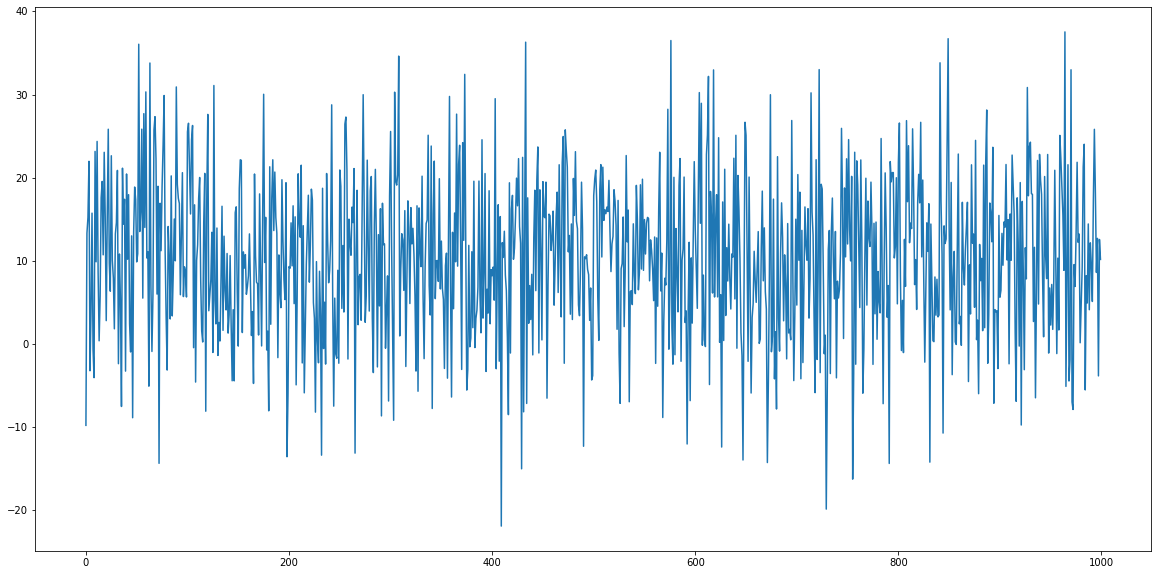

In [8]:
plt.figure(figsize=(20,10))
plt.plot(samples_list)
plt.show()

In [9]:
signal = []
for i in range(2, 1000):
    tmp = pid_controller(samples_list[:i])
#     if tmp < 0:
#         tmp = 0
    signal.append(tmp)

signal

[24.51128753576952,
 24.548103345836264,
 28.390428571140244,
 14.14869865921311,
 19.289999618496672,
 25.69284941599753,
 16.079867844651883,
 14.969346902924752,
 30.355078019159695,
 21.783111193495568,
 30.661394406911963,
 21.382310526701566,
 17.60905945791434,
 21.03466990107034,
 27.460490751303144,
 28.1444211611549,
 23.29280827457341,
 30.754236899923214,
 26.013825195637637,
 19.559382216399715,
 27.192125178825243,
 32.646244789471886,
 23.34310827121135,
 22.359073649896345,
 31.72268253166644,
 24.081253322965534,
 23.626322260670488,
 20.379136834521418,
 27.11432862115096,
 27.42121525471316,
 31.02460463929001,
 17.8849740232848,
 26.42013336953068,
 22.65654063088461,
 15.925324677967586,
 32.54761935117373,
 27.553207625729584,
 29.709241561399338,
 18.14659069202157,
 32.439773975207984,
 25.708172252009405,
 30.67719094322285,
 21.7653682522656,
 20.664201532888963,
 28.650827296988833,
 15.819730462654741,
 29.35107616796744,
 31.397524779822653,
 30.46467306085

In [10]:
pd.DataFrame(signal).to_csv('data/signal.csv', index=False, header=False)

In [11]:
seal_result = pd.read_csv('data/seal_result.csv', header=None)
seal_result.rename(columns={0: 'value'}, inplace=True)
seal_result

,value
0,24.5146
1,24.5514
2,28.3938
3,14.1520
4,19.2933
...,...
993,127.4300
994,122.6850
995,125.5440
996,116.1920


In [12]:
seal_result_recursive = pd.read_csv('data/seal_result_recursive.csv', header=None)
seal_result_recursive.rename(columns={0: 'value'}, inplace=True)
seal_result_recursive

,value
0,24.6129
1,24.6498
2,28.4921
3,14.2503
4,19.3917
...,...
993,127.5280
994,122.7840
995,125.6420
996,116.2910


In [13]:
seal_result_reencryption = pd.read_csv('data/seal_result_reencryption.csv', header=None)
seal_result_reencryption.rename(columns={0: 'value'}, inplace=True)
seal_result_reencryption

,value
0,24.6129
1,24.6498
2,28.4921
3,14.2503
4,19.3917
...,...
993,127.5280
994,122.7840
995,125.6420
996,116.2910


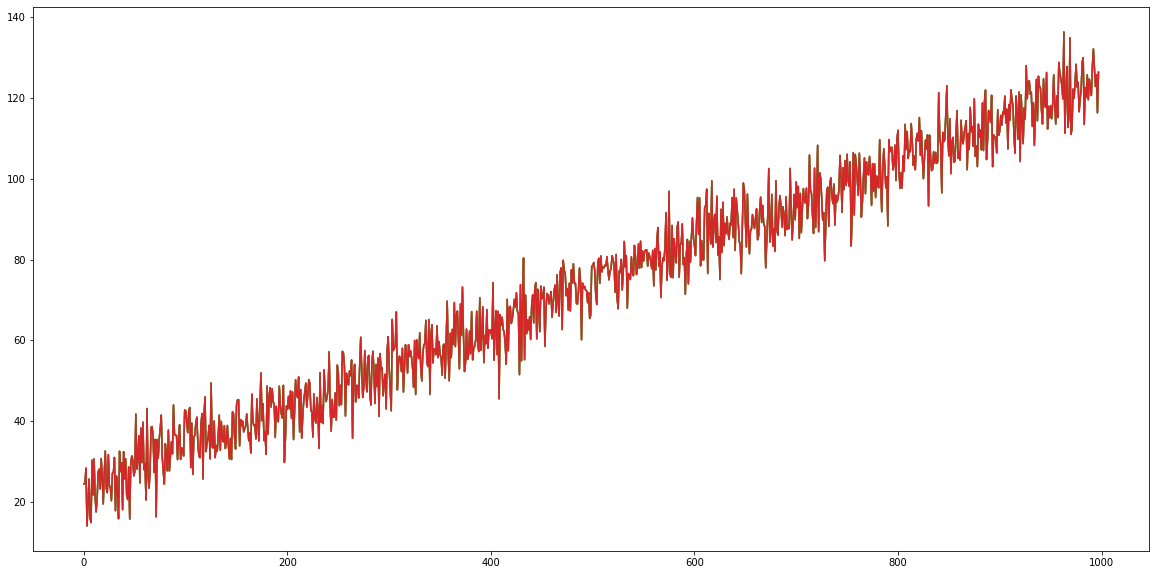

In [14]:
plt.figure(figsize=(20,10))
plt.plot(signal)
plt.plot(seal_result)
plt.plot(seal_result_recursive)
plt.plot(seal_result_reencryption)
plt.show()

In [15]:
seal_result_list = seal_result['value'].tolist()
pid_error = pe(signal, seal_result_list)
seal_result_recursive_list = seal_result_recursive['value'].tolist()
rpid_error = pe(signal, seal_result_recursive_list)
seal_result_reencryption_list = seal_result_reencryption['value'].tolist()
rpid_error = pe(signal, seal_result_reencryption_list)
print("Error between encrypted PID and plaintext PID: ", 100*pid_error, "%")
print("Error between recursive PID and plaintext PID: ", 100*rpid_error, "%")
print("Error between recursive PID with re-encryption and plaintext PID: ", 100*rpid_error, "%")

Error between encrypted PID and plaintext PID:  0.5640833017713249 %
Error between recursive PID and plaintext PID:  17.137340984554417 %
Error between recursive PID with re-encryption and plaintext PID:  17.137340984554417 %
